[*********************100%***********************]  3 of 3 completed


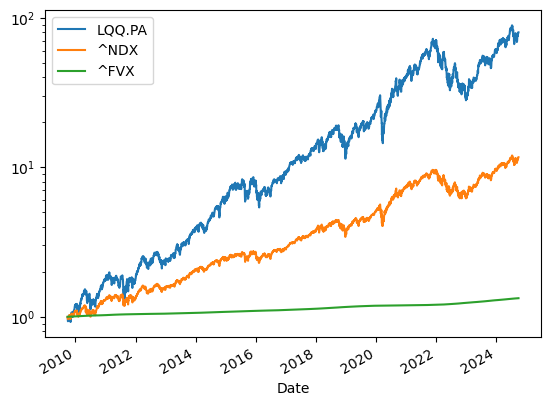

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Tickers to download
tickers   = ["LQQ.PA", "^NDX"]  # 2x Levearged NASDAQ100, NASDAQ100
risk_free = ["^FVX"]            # US treasury yield (5 years)

# Download the data from yf
data      = yf.download(tickers+risk_free,group_by='Date', start="2009-09-27", end="2024-09-27")

# Calculate the number of years and estimate the trading days per year
num_years               = (data.index[-1]-data.index[0]).days/365
trading_days_in_year    = int(len(data.index)/num_years)

# For every ticker in the list, forward fill the empty days and generate a column of percentual change
for t in tickers:
    data[(t, 'Adj Close')] = data[(t, 'Adj Close')].ffill()
    data[(t,'Pct Change')] = data[(t, 'Adj Close')].pct_change()
# The tickers in the risk_free list represent percentual changes thus they need to be treated differently
for t in risk_free:
    data[(t, 'Adj Close')]  = data[(t, 'Adj Close')].ffill()
    data[(t, 'Pct Change')] = data[(t,'Adj Close')].div(100*trading_days_in_year)
    data[(t, 'Adj Close')]  = data[(t, 'Pct Change')].add(1).cumprod()
# Sort again the indexes (after adding new columns)
data.sort_index(axis=1, inplace=True) 

# Plot data
for t in tickers+risk_free:
    data[(t,'Pct Change')].add(1).cumprod().plot(label=t)

plt.yscale('log')
plt.legend()
plt.show()

In [2]:
print(f"Period: {num_years:.1f} years")
riskfree_return =  ((data[('^FVX', 'Adj Close')].iloc[-1]/data[('^FVX', 'Adj Close')].iloc[0])**(1/num_years)-1)
print(f"Annualized risk-free return: {100*riskfree_return:.1f} %")
for t in tickers:
    print(f"Ticker: {t}")
    excess_returns      = (data[(t, 'Adj Close')].iloc[-1]/data[(t, 'Adj Close')].iloc[0])**(1/num_years)-1 -riskfree_return
    standard_deviation  = data[(t, 'Pct Change')].std() * (trading_days_in_year**0.5)
    sharpe_ratio        = excess_returns / standard_deviation
    currmax = maximum_drowdown= 0
    for i in range(len(data.index)):
        currmax = max(currmax, data[(t, 'Adj Close')].iloc[i])
        maximum_drowdown = min(maximum_drowdown, (data[(t, 'Adj Close')].iloc[i]-currmax)/currmax)
    print(f"    Excess return      = {100*excess_returns:.1f} %")
    print(f"    Maximum drowdown   = {-100*maximum_drowdown:.1f} %")
    print(f"    Standard deviation = {100*standard_deviation:.1f} %")
    print(f"    Sharpe ratio       = {sharpe_ratio:.2f}")
    print("-------")

Period: 15.0 years
Annualized risk-free return: 1.9 %
Ticker: LQQ.PA
    Excess return      = 32.0 %
    Maximum drowdown   = 61.2 %
    Standard deviation = 36.7 %
    Sharpe ratio       = 0.87
-------
Ticker: ^NDX
    Excess return      = 15.9 %
    Maximum drowdown   = 35.6 %
    Standard deviation = 20.6 %
    Sharpe ratio       = 0.77
-------


In [26]:
windows = [50, 100, 150, 200]
for w in windows:
    signal = data[('^NDX', 'Adj Close')]>data[('^NDX', 'Adj Close')].rolling(window = w).mean()
    data[('MyStrategy', 'Pct Change')] = np.where(signal.shift(1), data[('LQQ.PA', 'Pct Change')], data[('^FVX', 'Pct Change')])
    data[('MyStrategy', 'Adj Close')] = data[('MyStrategy', 'Pct Change')].add(1).cumprod()

    num_years               = (data.index[-1]-data.index[w]).days/365

    excess_returns      = (data[('MyStrategy', 'Adj Close')].iloc[-1]/data[('MyStrategy', 'Adj Close')].iloc[w])**(1/num_years)-1 -riskfree_return
    standard_deviation  = data[('MyStrategy', 'Pct Change')].std() * (trading_days_in_year**0.5)
    sharpe_ratio        = excess_returns / standard_deviation
    print(f"Window size: {w} days")
    print(f"    Excess return      = {100*excess_returns:.1f} %")
    print(f"    Standard deviation = {100*standard_deviation:.1f} %")
    print(f"    Sharpe ratio       = {sharpe_ratio:.2f}")
    print("-------")

Window size: 50 days
    Excess return      = 38.2 %
    Standard deviation = 25.2 %
    Sharpe ratio       = 1.52
-------
Window size: 100 days
    Excess return      = 34.8 %
    Standard deviation = 27.0 %
    Sharpe ratio       = 1.29
-------
Window size: 150 days
    Excess return      = 32.6 %
    Standard deviation = 28.4 %
    Sharpe ratio       = 1.15
-------
Window size: 200 days
    Excess return      = 35.1 %
    Standard deviation = 28.5 %
    Sharpe ratio       = 1.23
-------


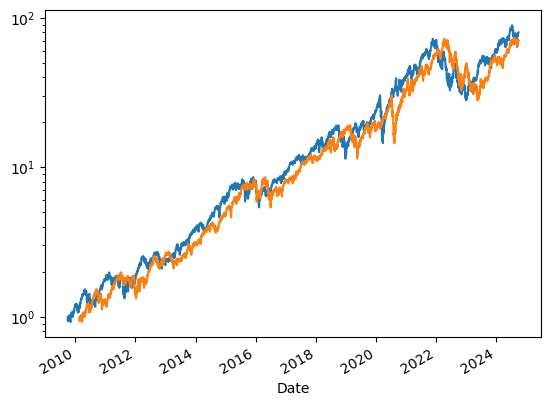

In [14]:

#data[('MyStrategy', 'Pct Change')].add(1).cumprod().plot()
data[('LQQ.PA', 'Pct Change')].add(1).cumprod().plot()
data[('LQQ.PA', 'Pct Change')].shift(100).add(1).cumprod().plot()
plt.yscale('log')


In [204]:
data = yf.download(["LQQ.PA", "CNDX.AS"],group_by='Date', start="2021-09-27", end="2024-09-27")

[*********************100%***********************]  2 of 2 completed


In [20]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4]})
print(df)
print(df.shift(1).rolling(window=2).mean())

   B
0  0
1  1
2  2
3  3
4  4
     B
0  NaN
1  NaN
2  0.5
3  1.5
4  2.5


In [25]:
signal.shift(1)

Date
2009-09-28      NaN
2009-09-29    False
2009-09-30    False
2009-10-01    False
2009-10-02    False
              ...  
2024-09-20     True
2024-09-23     True
2024-09-24     True
2024-09-25     True
2024-09-26     True
Name: (^NDX, Adj Close), Length: 3876, dtype: object